# Análisis del dataset Pokemon

1. Importa la librería de pandas y numpy

In [ ]:
import pandas as pd
import numpy as np

2. Importar dataset

In [ ]:
df = pd.read_csv('/content/Pokemon.csv')

# Sección nueva

3. Imprime las 10 primeras líneas de nuestro nuevo dataframe mediante la función head

In [ ]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


4. Encuentra cuántas filas y columnas tiene df mediante la función shape

In [ ]:
df.shape

(800, 13)

5. Obtén la información básica del dataframe mediante la función info. Fíjate en si hay alguna columna con elementos nulos, de que tipo son los datos de cada columna.

In [ ]:
df.info() # Hay elementos nulos en la columna Type 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


6. Aplica la función drop_duplicates a df para eliminar duplicados si los hay. Luego imprime la shape del nuevo dataframe y mira si se han borrado duplicados. Si había duplicados, ahora debería haber menos filas en df.

In [ ]:
df2 = df.drop_duplicates()

In [ ]:
df2.shape

(800, 13)

En el ejercicio anterior te debería haber salido que no hay duplicados. Pero si nos fijamos en el ejercicio 3, cuándo hemos imprimido las 10 primeras filas de df vemos que hay elementos que tienen el mismo id en la columna '#', como el pokemon con '#'==3. Esto es porque la función drop_duplicates elimina aquellos registros (filas) que tienen  el mismo valor **en todas las columnas** que otro registro.


Si queremos un dataset sin megaevoluciones, deberemos eliminar las filas que tienen el id repetido en la columna '#' y quedarnos solo con la primera aparición de ese id. Para ello usaremos la función drop_duplicates especificando el parámetro subset=['column_name'] donde column_name será el nombre de la columna con duplicados que queremos tomar como referencia. En este caso el column_name será #

7. Quédate con una versión de df sin megaevoluciones, es decir, si hay más de un pokemon con el mismo número en la columna # quédate solo con su primera aparición. Y guárdala en un dataframe llamado sub_df

In [ ]:
sub_df = df.drop_duplicates(subset = ['#'])

8. Aplica la función head a sub_df para ver como ha quedado nuestro subdataset e imprime su shape para ver con cuántos registros nos hemos quedado.

In [ ]:
sub_df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [ ]:
sub_df.shape # El número de filas disminuyó

(721, 13)

9. Aplica la función .nunique() a la columna '#' de df para ver cuántos valores únicos tenía. Este número deberá coincidir con el número de filas de sub_df

In [ ]:
df['#'].nunique() # si coincide

721

10. Haz que la columna # ahora sea el index de sub_df, aplica la función .set_index() con inplace=True

In [ ]:
sub_df.set_index('#',inplace=True)

Aplica la función head a sub_df para ver que has establecido el índice correctamente. A partir de aquí trabajaremos siempre con sub_df a nos ser que se indicara lo contrario.

In [ ]:
sub_df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


11. Mira que columnas de sub_df tienen nulos y cuántos registros nulos tienen mediante la función isnull

In [ ]:
sub_df.isnull().sum() # Type 2 tiene registros nulos

Name            0
Type 1          0
Type 2        371
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

12. Deberías haber obtenido que solamente tenemos nulos en la columna Type 2. Sustituye los nulos de Type 2 con la string 'No type 2', usa la función .fillna() y pásale un diccionario con key el nombre de la columna a la que queremos reemplazar los nulos, en este caso 'Type 2' y con value el valor por el que queremos reemplazar los nulos, en este caso 'No type 2'. Recuerda usar inplace=True para alterar el propio dataframe.

In [ ]:
sub_df['Type 2'].fillna('No type 2', inplace = True)

# sub_df.fillna({'Type 2' : 'No type 2', 'Attack' : 0}, inplace = True) Sustituye los nulos de varias columnas con diccionarios

<ipython-input-17-a4fef8d67eeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Type 2'].fillna('No type 2', inplace = True)


In [ ]:
sub_df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

13. Imprime los nombres de las columnas. Luego renombra las columnas de manera que no contengan espacios y que todas sus letras sean minúsculas

In [ ]:
sub_df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
sub_df.columns = ['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp.Atk', 'Sp.Def', 'Speed', 'Generation', 'Legendary']

In [ ]:
sub_df.columns

Index(['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp.Atk', 'Sp.Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
sub_df.columns = [col.lower() for col in sub_df]

In [ ]:
sub_df.columns

Index(['name', 'type_1', 'type_2', 'total', 'hp', 'attack', 'defense',
       'sp.atk', 'sp.def', 'speed', 'generation', 'legendary'],
      dtype='object')

In [ ]:
#sub_df.columns = sub_df.columns.str.lower

In [ ]:
# sub_df.columns = [col.lower().replace(' ', '') for col in sub_df]

In [ ]:
# otro método
# sub_df.rename(columns = {'sp.atk' :'sp.attack', 'sp.def':'sp.defense'}, inplace = True)

14. Cuántos pokemons legendarios hay en sub_df?

In [ ]:
sum(sub_df['legendary'] == True)
#sub_df['legendary'].value_counts()

46

15. Encuentra cuántos pokemons hay de cada type1 y haz que se muestren en pantalla en orden, del tipo del que hay más pokemons al que hay menos

In [ ]:
sub_df['type_1'].value_counts()
# sub_df[['type_1', 'name']].groupby('type_1').count()  Ordena por el type 1
# sub_df[['type_1', 'name']].groupby('type_1').count().sort_values(by='name', ascending=False)
# sub_df[['type_1', 'name']].groupby('type_1').agg()

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: type_1, dtype: int64

16. Toma el código del ejercicio anterior, pero ahora guarda el resultado en un dataframe llamado pokemons_type1, que contenga type1 como índice y una columna llamada count donde se almacene la cuenta

In [ ]:
pokemons_type1 = pd.DataFrame(sub_df['type_1'].value_counts())

In [ ]:
pokemons_type1.columns = ['count']

In [ ]:
pokemons_type1

,count
Water,105
Normal,93
Grass,66
Bug,63
Fire,47
Psychic,47
Rock,41
Electric,36
Ground,30
Poison,28


In [ ]:
pokemons_type1.shape

(18, 1)

17. En base a los ejercicios anteriores, cuál es el tipo de pokemon del que hay más de ellos? Cuál es el que hay menos?

Hay mas pokemones Agua (105), Hay solo 3 de tipo Volador

18. Cuál es la media de ataque y la media de defensa de los pokemons con type1 igual a Fire? Y de los pokemons con type1 igual a Water?

In [ ]:
pokemon_fire = sub_df[sub_df['type_1'] == 'Fire']
print(pokemon_fire)

                        name type_1     type_2  total   hp  attack  defense  \
#                                                                             
4                 Charmander   Fire  No type 2    309   39      52       43   
5                 Charmeleon   Fire  No type 2    405   58      64       58   
6                  Charizard   Fire     Flying    534   78      84       78   
37                    Vulpix   Fire  No type 2    299   38      41       40   
38                 Ninetales   Fire  No type 2    505   73      76       75   
58                 Growlithe   Fire  No type 2    350   55      70       45   
59                  Arcanine   Fire  No type 2    555   90     110       80   
77                    Ponyta   Fire  No type 2    410   50      85       55   
78                  Rapidash   Fire  No type 2    500   65     100       70   
126                   Magmar   Fire  No type 2    495   65      95       57   
136                  Flareon   Fire  No type 2    52

In [ ]:
print('El ataque promedio de los pokemones fuego es: ',np.mean(pokemon_fire['attack']))
print('La defensa promedio de los pokemones fuego es: ',np.mean(pokemon_fire['defense']))

El ataque promedio de los pokemones fuego es:  82.2127659574468
La defensa promedio de los pokemones fuego es:  64.8936170212766


In [ ]:
pokemon_water = sub_df[sub_df['type_1'] == 'Water']
print(pokemon_water)

          name type_1     type_2  total  hp  attack  defense  sp.atk  sp.def  \
#                                                                              
7     Squirtle  Water  No type 2    314  44      48       65      50      64   
8    Wartortle  Water  No type 2    405  59      63       80      65      80   
9    Blastoise  Water  No type 2    530  79      83      100      85     105   
54     Psyduck  Water  No type 2    320  50      52       48      65      50   
55     Golduck  Water  No type 2    500  80      82       78      95      80   
..         ...    ...        ...    ...  ..     ...      ...     ...     ...   
656    Froakie  Water  No type 2    314  41      56       40      62      44   
657  Frogadier  Water  No type 2    405  54      63       52      83      56   
658   Greninja  Water       Dark    530  72      95       67     103      71   
692  Clauncher  Water  No type 2    330  50      53       62      58      63   
693  Clawitzer  Water  No type 2    500 

In [ ]:
#df_fire[['attack', 'defense]].mean()
print('El ataque promedio de los pokemones de agua es: ', np.mean(pokemon_water['attack']))
print('La defensa promedio de los pokemones de agua es: ', np.mean(pokemon_water['defense']))

El ataque promedio de los pokemones de agua es:  71.04761904761905
La defensa promedio de los pokemones de agua es:  70.48571428571428


In [ ]:
#sub_df[sub_df['type_1']=='Fire'][['attack','defense']].mean()

Quién tiene una media de ataque mayor, los pokemons de fuego o los de agua? Y una media de defensa mayor?


*   Los pokemones de fuego tienen mayor ataque que los de agua
*   Los pokemones de agua tienen mayor defensa que los de fuego



19. Calcula la media de ataque (attack) de los pokemons por tipo (type1). Es decir, queremos obtener un dataframe con índice type1 y una columna que contenga la media de attack para cada uno de estos type1

In [ ]:
sub_df[['type_1','attack']].groupby('type_1').agg(np.mean).sort_values('attack', ascending = False)


,attack
type_1,
Dragon,102.625000
Fighting,94.720000
Ground,91.300000
Rock,88.463415
Steel,88.090909
Dark,86.250000
Fire,82.212766
Poison,74.678571
Normal,71.731183


Cuál es el tipo de pokemon con mayor ataque medio? Y el de menor ataque medio?

El tipo dragón es el que tiene mayor promedio de ataque, El Psíquico es el que tiene menor promedio de ataque


20. Cuál es el pokemon con mayor hp?

In [ ]:
sub_df[['name','hp']].max()


name    Zygarde50% Forme
hp                   255
dtype: object

21. Crea un dataframe con todos los pokemons con defensa (defense) superior a la media

In [ ]:
print(np.mean(sub_df['defense']))
sub_df[sub_df['defense'] > np.mean(sub_df['defense'])]

70.69764216366158


,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary
#,,,,,,,,,,,,
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,Wartortle,Water,No type 2,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,No type 2,530,79,83,100,85,105,78,1,False
18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
716,Xerneas,Fairy,No type 2,680,126,131,95,131,98,99,6,True
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True


22. Cuántos pokemons de cada tipo (type1) hay en el dataframe del ejercicio anterior? Cuál es el tipo (type1) de pokemon que tiene más pokemons con defensa superior a la media?

In [ ]:
pokemon_defenseup = sub_df[sub_df['defense'] > np.mean(sub_df['defense'])]

In [ ]:
pokemon_defenseup['type_1'].value_counts()

Water       47
Rock        30
Grass       26
Bug         22
Normal      20
Steel       20
Ground      19
Fire        15
Dragon      14
Psychic     14
Poison      11
Ice         11
Fighting    10
Dark        10
Ghost       10
Electric     8
Fairy        7
Flying       1
Name: type_1, dtype: int64

23. Crea una nueva columna llamada flag_type2 que contenga un 0 si en la columna type2 tenemos 'No type 2' y que contenga un 1 si en la columna type2 aparece otra cosa

In [ ]:
def flag_type2_fun(x):
  if x == 'No type 2':
    return 0
  else:
    return 1

In [ ]:
sub_df['flag_type2'] = sub_df['type2'].apply(flag_type2_fun)

In [ ]:
sub_df['flag_type2'] = [0 if s == 'No type 2' else 1 for s in sub_df['type_2']]

<ipython-input-43-ee4c6a08a123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['flag_type2'] = [0 if s == 'No type 2' else 1 for s in sub_df['type_2']]


In [ ]:
sub_df

,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary,flag_type2
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
4,Charmander,Fire,No type 2,309,39,52,43,60,50,65,1,False,0
5,Charmeleon,Fire,No type 2,405,58,64,58,80,65,80,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,1
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1


In [ ]:
sub_df['flag_type2'] = np.where(sub_df['type_2'] == 'No type 2', 0,1)

<ipython-input-45-72092b84f418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['flag_type2'] = np.where(sub_df['type_2'] == 'No type 2', 0,1)


In [ ]:
sub_df

,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary,flag_type2
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
4,Charmander,Fire,No type 2,309,39,52,43,60,50,65,1,False,0
5,Charmeleon,Fire,No type 2,405,58,64,58,80,65,80,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,1
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,1
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1


24. Muestra los datos del pokemon 'Pikachu', y si tenías/tienes alguno preferido dame sus datos también

In [ ]:
sub_df.loc[sub_df['name']=='Pikachu']

,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary,flag_type2
#,,,,,,,,,,,,,
25,Pikachu,Electric,No type 2,320,35,55,40,50,50,90,1,False,0


25. Imprime las estadísticas básicas de los pokemons con type1 igual a Grass y type2 igual a Poison (que cumplan las dos condiciones), mediante la función .describe()

In [ ]:
sub_df[(sub_df['type_1']=='Grass') & (sub_df['type_2']=='Poison')].describe()

,total,hp,attack,defense,sp.atk,sp.def,speed,generation,flag_type2
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,399.000000,63.785714,68.428571,58.214286,84.642857,72.142857,51.785714,2.142857,1.0
std,86.842917,19.407289,19.492461,15.967171,21.073524,20.164161,20.532071,1.657484,0.0
min,280.000000,40.000000,30.000000,35.000000,50.000000,30.000000,15.000000,1.000000,1.0
25%,318.500000,50.000000,56.250000,46.000000,71.250000,65.000000,40.000000,1.000000,1.0
50%,397.500000,60.000000,67.500000,59.000000,85.000000,72.500000,52.500000,1.000000,1.0
75%,483.500000,73.500000,81.500000,68.750000,100.000000,80.000000,63.750000,3.750000,1.0
max,525.000000,114.000000,105.000000,85.000000,125.000000,105.000000,90.000000,5.000000,1.0


26. Imprime un scatter plot de la rapidez (speed) versus el ataque (attack).

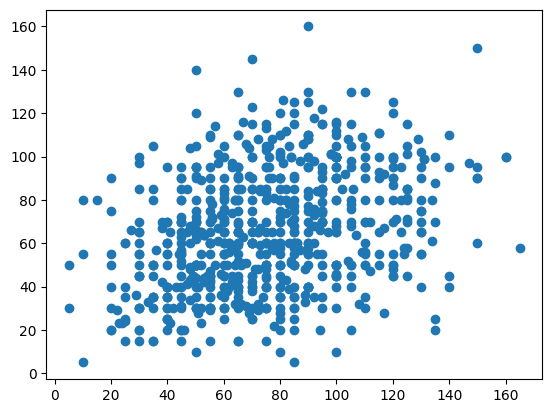

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(sub_df['attack'], sub_df['speed'])

27. Muestra las distintas generaciones que encontramos en el dataframe sub_df

In [ ]:
sub_df['generation'].value_counts()

5    156
1    151
3    135
4    107
2    100
6     72
Name: generation, dtype: int64